In [37]:
# Installing required libraries
!pip install torch
!pip install datasets
!pip install nltk
!pip install transformers
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install vaderSentiment
!pip install WordCloud
!pip install tensorflow


In [39]:
# Imporing all the necessary libraries
import re
import nltk
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from datasets import load_dataset
import time
from transformers import BertTokenizer, BertForSequenceClassification, DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch
from google.colab import files

import pandas as pd
import io
import re
import time
import joblib
from datasets import load_dataset
from google.colab import drive
from imblearn.over_sampling import RandomOverSampler

from nltk import pos_tag
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from google.colab import drive
drive.mount('/content/drive')

# Downloading necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

MULTINOMIAL NAIVE BAYES TEST

In [15]:
# Uploading the test data and model files
print("Please upload NB_TEST.csv file")
uploaded_data = files.upload()
print("Please upload NB_Model.pkl file")
uploaded_model = files.upload()

# Loading the test data
test_data = pd.read_csv(io.BytesIO(uploaded_data['NB_TEST.csv']))  # Ensure the correct file name

# Checking and handle missing labels
if 'label' in test_data.columns and test_data['label'].isnull().any():
    print("Handling NaN values in test labels...")
    test_data['label'].fillna(test_data['label'].mode()[0], inplace=True)

X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

# Loading the Naive Bayes model
best_nb_model = joblib.load(io.BytesIO(uploaded_model['NB_Model.pkl']))  # Ensure the correct file name


Saving NB_TEST.csv to NB_TEST.csv


Saving NB_Model.pkl to NB_Model.pkl
Handling NaN values in test labels...


In [16]:
# Making predictions
y_pred = best_nb_model.predict(X_test)
# Note: Naive Bayes might not support predict_proba by default depending on the distribution type
try:
    y_pred_probs = best_nb_model.predict_proba(X_test)[:, 1]
except AttributeError:
    # For models that do not support probability estimates
    y_pred_probs = None

# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Naive Bayes Model Evaluation:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


Naive Bayes Model Evaluation:
Accuracy: 0.4599686028257457
Precision: 0.0014534883720930232
Recall: 0.5
F1 Score: 0.002898550724637681


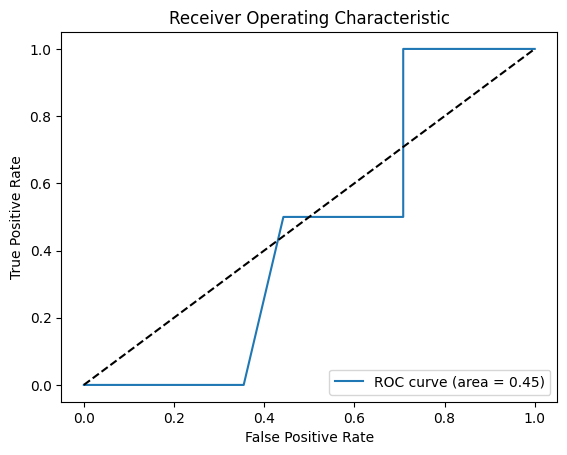

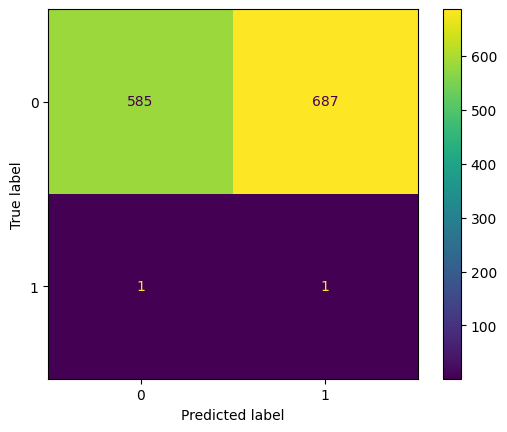

In [19]:
if y_pred_probs is not None:
    # Plotting ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Displaying confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


RANDOM FOREST TEST

In [41]:
# Uploading the test data and model files
print("Please upload RF_TEST.csv file")
uploaded_data = files.upload()
print("Please upload RF_Model.pkl file")
uploaded_model = files.upload()



Saving RF_TEST.csv to RF_TEST (1).csv


Saving RF_Model.pkl to RF_Model (1).pkl


Random Forest Model Evaluation:
Accuracy: 0.5321821036106751, Precision: 0.0016778523489932886, Recall: 0.5, F1 Score: 0.0033444816053511705


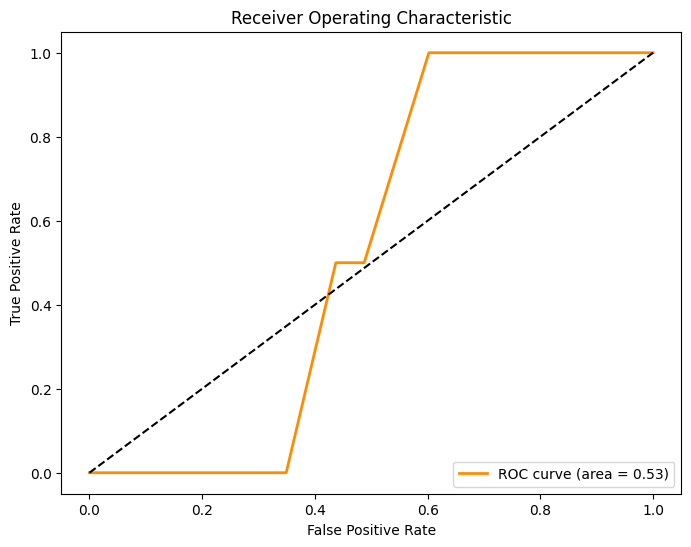

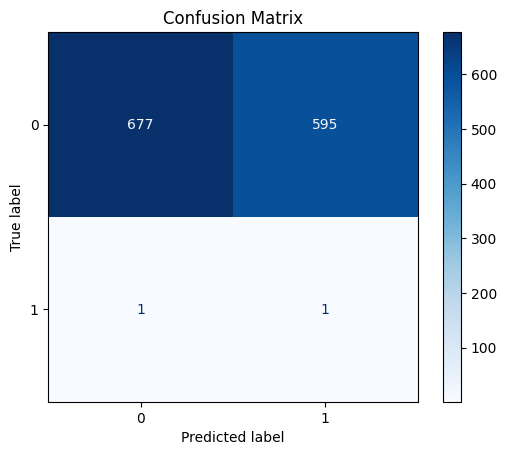

In [43]:
# Function to upload and load test data and model from the local system
def load_data_and_model():
    test_data = pd.read_csv(io.BytesIO(uploaded_data[next(iter(uploaded_data))]))

    model_path = next(iter(uploaded_model))
    best_rf_model = joblib.load(io.BytesIO(uploaded_model[model_path]))

    return test_data, best_rf_model

# Uploading data and model
test_data, best_rf_model = load_data_and_model()

# Handling missing values in the label and features
if 'label' in test_data.columns:
    test_data['label'].fillna(test_data['label'].mode()[0], inplace=True)  # Filling NaNs in labels with the mode value

# Converting features to numeric if not already, handling any remaining inappropriate types
for col in test_data.columns.drop('label'):
    if test_data[col].dtype == 'object':
        test_data[col] = pd.to_numeric(test_data[col], errors='coerce')  # Forces non-numeric to NaN then fill
    test_data[col].fillna(test_data[col].median(), inplace=True)  # Replaces NaNs with median for each column

X_test = test_data.drop('label', axis=1).values  # Extracting features
y_test = test_data['label'].values  # Extracting labels

# Predicting class labels and probabilities for evaluation
y_pred = best_rf_model.predict(X_test)
y_pred_probs = best_rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


SVM TEST

Upload your test dataset:


Saving SVM_TEST.csv to SVM_TEST (2).csv
Upload your saved SVM model:


Saving SVM_Model.pkl to SVM_Model (2).pkl
Upload your saved vectorizer:


Saving vectorizer.pkl to vectorizer.pkl
Model Evaluation:
Accuracy: 0.995
Precision: 0.75
Recall: 1.0
F1 Score: 0.8571428571428571


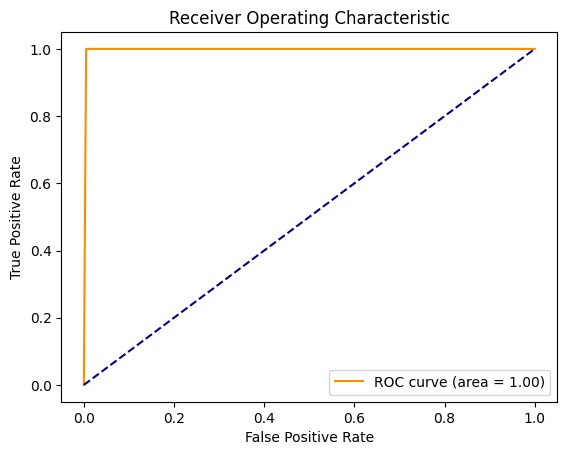

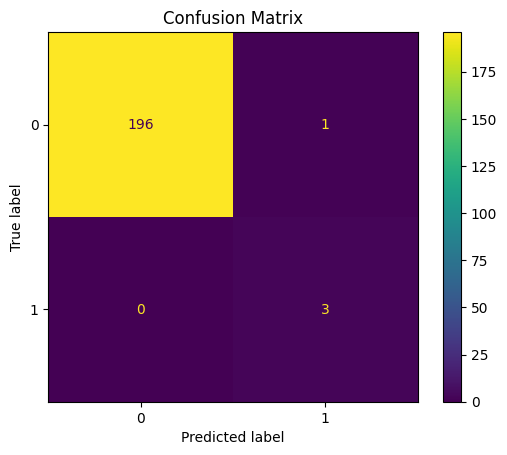

In [63]:
import pandas as pd
import io
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib
from google.colab import files

# Prompting to upload the saved model and vectorizer
print("Please upload SVM_TEST.csv file")
uploaded_data = files.upload()
print("Please upload SVM_Model.pkl file")
uploaded_model = files.upload()
print("Please upload vectorizer.csv file")
uploaded_vectorizer = files.upload()

# Loading the test data
test_data_filename = next(iter(uploaded_data))
test_data = pd.read_csv(io.BytesIO(uploaded_data[test_data_filename]))

# Loading the SVM model
model_filename = next(iter(uploaded_model))
best_model = joblib.load(io.BytesIO(uploaded_model[model_filename]))

# Loading the vectorizer
vectorizer_filename = next(iter(uploaded_vectorizer))
vectorizer = joblib.load(io.BytesIO(uploaded_vectorizer[vectorizer_filename]))

# Assuming test_data has 'comment_pos' as features and 'label' as target
X_test = test_data['comment_pos']
y_test = test_data['label']

# Handling any missing values in the labels
if y_test.isnull().any():
    y_test.fillna(y_test.mode()[0], inplace=True)

# Transforming the test data using the loaded vectorizer
X_test_vec = vectorizer.transform(X_test)

# Predicting with the loaded model
y_pred = best_model.predict(X_test_vec)
y_pred_probs = best_model.predict_proba(X_test_vec)[:, 1]

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plotting ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Displaying the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


LSTM TEST

In [ ]:
!pip install tensorflow
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
# and other Keras functionalities

def upload_files():
    print("Please upload LSTM_TEST.csv file")
    uploaded_test_data = files.upload()

    print("Please upload LSTM_Model.h5 file")
    uploaded_model_file = files.upload()

    test_data_filename = next(iter(uploaded_test_data))
    model_filename = next(iter(uploaded_model_file))

    # Loading test data
    test_data = pd.read_csv(io.BytesIO(uploaded_test_data[test_data_filename]))
    # Loading the model
    model = load_model(io.BytesIO(uploaded_model_file[model_filename]))

    return test_data, model

# Loading data and model
test_data, model = upload_files()

# Assuming 'label' column is the target variable and other columns are features
X_test = pad_sequences(test_data.drop('label', axis=1).values, maxlen=test_data.shape[1] - 1)  # Adjust maxlen accordingly
y_test = test_data['label'].values

# Handling any missing values in y_test
if np.isnan(np.sum(y_test)):
    print("Missing values found in target variable, replacing with mode.")
    mode_value = pd.Series(y_test).mode()[0]
    y_test = np.nan_to_num(y_test, nan=mode_value)

# Predicting on test data
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype('int32')

# Evaluating the model using sklearn's metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Evaluation:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()
